In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from itertools import repeat

In [4]:
df = pd.read_excel('Hotel_Matrix.xlsx', sheet_name='JUNE_RELIZEDREV_')  #uploading data
df.set_index('Room/Day', inplace=True)                                  #reassigning index from {1,2,3...} to room numbers for rows and 1-30 for columns

df_array = df.iloc[:-6,:-4]                                             #eliminating the marginal calculations attached to this data sheet
print(df_array.iloc[:5,:5])                                             #preview the first five entries

           1      2       3       4       5
Room/Day                                   
130      NaN    NaN  129.40  199.72  271.00
131      NaN    NaN  206.33  180.72  276.27
132      NaN    NaN  143.78  197.24  198.36
133      NaN    NaN     NaN     NaN  395.00
134      NaN  224.0  221.00  212.63     NaN


In [6]:
arr = df_array.to_numpy()                               #modifying the data type to make calculations in numpy
#df_array.replace(np.nan,0,inplace=True)                #option to remove nans and do the calculations with 0 income stays instead of missing stays
#mask = np.where(df_array != np.NaN, True, False)       #option to create occupancy matrix with Indicator function True or 1 = occupied, False or 0 o.w.

In [8]:
def Central_Tendencies(X):
    """A function that take the mean and standard deviation of all rooms 
    then normalizes the room price over the course of a month"""
    room_distributions = {}
    price_matrix = X
    for i in range(0,len(price_matrix.index)):                           #this iteration counts all the rooms which are assigned to an index
        room_number = price_matrix.index[i]  
                                                                        #the following commented print can be seen with a box and whisker plot below
        #print(f"Room{room_number}: Minium Nightly Rate is {np.min(df_array.iloc[i,:])} and Maximum Nightly Rate is {np.max(df_array.iloc[i,:])}")
        row = price_matrix.iloc[i,:]                                    #define the current room and corresponding 30 days of residency for room vector
        room_sd = np.std(row)                                           #return the standard deviation of this room vector
        room_mu = np.mean(row)                                          #return the mean of this room vector                                   
        room_distributions[room_number] = [room_mu,room_sd]             #a dictionary with all means and standard deviations called room distributions
    price_matrix.iloc[i,:] = (row - room_mu)/room_sd                    #reassign the room vector to the corresponding row in the array but normalized
    return price_matrix , room_distributions
                              
volatility_matrix, central_tendencies = Central_Tendencies(df_array)    #Calling the Function to get the new array that has been normaliz#ed
#volatility_matrix
central_tendencies

{130: [227.90375000000003, 89.10994640576044],
 131: [289.23105263157896, 117.58040025960005],
 132: [208.58142857142857, 137.66241629385976],
 133: [328.19733333333335, 100.15087867590357],
 134: [277.90227272727276, 160.7290220987943],
 135: [326.96315789473687, 121.60691259146292],
 136: [325.07190476190476, 133.9077003945005],
 137: [352.65384615384613, 199.29914552823357],
 201: [307.89388888888885, 149.35969135460616],
 203: [304.369, 155.07435809636613],
 204: [334.295, 149.80220517402273],
 205: [197.788, 171.5993659545396],
 206: [338.88944444444445, 142.5999887982005],
 207: [307.1928571428572, 113.82726383356815],
 208: [308.64722222222224, 112.32707756100068],
 209: [267.5166666666667, 99.36112233537838],
 210: [334.3314285714286, 165.67006374649802],
 211: [303.2314285714286, 162.132634454332],
 212: [262.16, 102.91455496444325],
 213: [426.625, 189.23625280320894],
 214: [335.93266666666665, 223.46299566793803],
 215: [323.28899999999993, 167.72438128966223],
 216: [328.5

<Axes: >

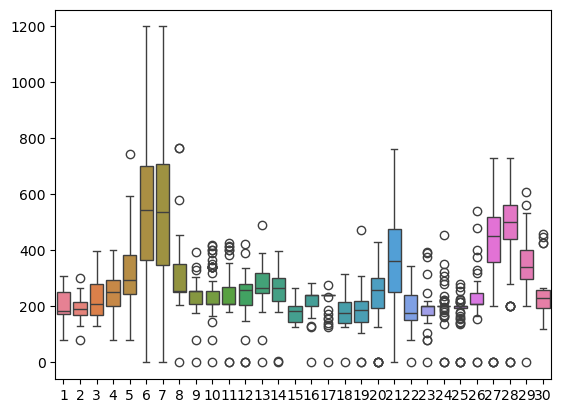

In [10]:
sns.boxplot(df_array)                    #visualizing spread of raw prices across all 30 days

In [12]:
DoW = {}                                                         #A quick dictionary for days of the week sub array
DoW['Sunday'] = df_array.iloc[:,[0,7,14,21,28]]
DoW['Monday'] = df_array.iloc[:,[1,8,15,22,29]]
DoW['Tuesday'] = df_array.iloc[:,[2,9,16,23]]
DoW['Wednesday'] = df_array.iloc[:,[3,10,17,24]]
DoW['Thursday'] = df_array.iloc[:,[4,11,18,25]]
DoW['Friday'] = df_array.iloc[:,[5,12,19,26]]
DoW['Saturday'] = df_array.iloc[:,[6,13,20,27]]
print(DoW['Sunday'])

           1      8     15     22      29
Room/Day                                 
130      NaN  253.0  184.0    NaN  305.23
131      NaN    NaN    NaN  182.6  389.00
132      NaN    NaN  195.0    NaN  295.79
133      NaN  388.0    NaN    NaN     NaN
134      NaN  263.0    NaN   79.0  336.00
...       ..    ...    ...    ...     ...
510      NaN    NaN    NaN    NaN     NaN
511      NaN    NaN    NaN    NaN  199.00
512      NaN    NaN    NaN    NaN  425.00
513      NaN    NaN    NaN    NaN  349.00
514      NaN    NaN    NaN    NaN     NaN

[124 rows x 5 columns]


<Axes: >

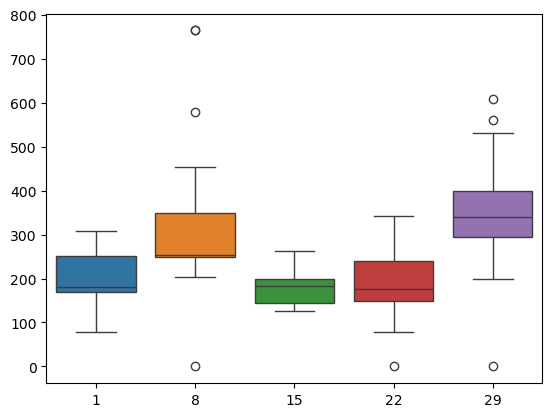

In [14]:
sns.boxplot(DoW['Sunday'])                                               #breaking up the above visualization by each day of week.
#sns.boxplot(DoW['Monday'])
#sns.boxplot(DoW['Tuesday'])
#sns.boxplot(DoW['Wednesday'])
#sns.boxplot(Dow['Thursday'])
#sns.boxplot(DoW['Friday'])
#sns.boxplot(DoW[Saturday'])

In [16]:
def AvgDaily_Vacancy():
    """This function creates an average % occupancy for each day of the week
    to use as a basis for future probabalistic calculations."""
    percent_vacancies = {}                                                             #Define a dictionary to populate with vacancies
    for x in ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']: #iterative across the days of the week
        try:
            first, second, third, fourth, fifth = np.sum(pd.isna(DoW[x]),axis=0)       #each week of June that contains a DoW is defined in dictionary
            TotalMissing_ = first + second + third + fourth + fifth                    #sum of all weeks of june for a DoW contains TotalMissing values                     
        except:
            first, second, third, fourth = np.sum(pd.isna(DoW[x]),axis=0)              #If there are only 4 weeks in June containing the DoW it goes here
            TotalMissing_ = first + second + third + fourth
        Total_ = np.size(DoW[x])                                                       #This is the total of the days for each DoW in June
        PercentMissing_ = TotalMissing_ / Total_                                       #We divide all vacancies by the total days in each DoW in June
        percent_vacancies[x] = PercentMissing_ *100                                    #Assign a new dictionary with the updated % vacancy 
    return percent_vacancies                                                            

DOW_Vacant = AvgDaily_Vacancy()                                                        #Calling function to return average daily vacancies


DOW_Occupied = [100-i for i in list(DOW_Vacant.values())]                             #The reverse of the vacancy percent is the occupancy percent

DOW_Vacant

{'Sunday': 75.32258064516128,
 'Monday': 77.74193548387098,
 'Tuesday': 43.346774193548384,
 'Wednesday': 55.24193548387096,
 'Thursday': 56.048387096774185,
 'Friday': 37.29838709677419,
 'Saturday': 18.75}

In [18]:
df3 = pd.read_excel('DAILY RATE WORKBOOK.xlsx', sheet_name='COMPLETED STAY') #opening a new dataframe with discriptive categories for each occupied room
#df3

In [20]:
available_rooms = df3["ROOM"].unique()                                       #Creating a unique Series of total capacity, 124 rooms
available_rooms = available_rooms[np.isnan(available_rooms)==False].tolist() #Reducing any unique occurance of NaN and converting series to list
available_types = []                                                         #A container for the Room_Categories that will be extracted
for i in available_rooms:                                                    #Iterating 1->124
    j = pd.unique(df3.ROOM_CATEGORY[df3.ROOM==i]).tolist()                   #for every index of a room, a category is added to a list with that index
    available_types.append(str(*j))                                          #delisting categories and converting to a string before adding to container
                    
category_assignments = pd.DataFrame(list(zip(available_rooms,available_types)))        #zipping the rooms with their category and adding to a dataframe
#print(category_assignments)                                                           #print statement to check that the rooms are in order
category_assignments.to_excel('TypeAssignments.xlsx', index=False)                     #exporting this information for future use

In [22]:
volatility_matrix.insert(0, "Type", available_types)                               #inserting categorical information to the normalized matrix
df_sorted = df_array.sort_values(by='Type')                                        #Sorting the normalized matrix so the same categories are grouped
below_mean = df_sorted.replace(np.nan,100,inplace=False)                           #replacing NaN with 100 to make it numeric and a clear outlier
#below_mean

In [24]:
X = below_mean                                                    #making a copy of the sorted matrix
try:
    df_sub = X.dropna(subset=['Type'])                            #subsetting X by sorted categories, since we replaced NaN already dropna is not needed

    # Get unique categories and sort for consistent output
    categories = df_sub['Type'].to_numpy()
    unique_cats, inverse_idx = np.unique(categories, return_inverse=True)

    # Create a dictionary of small DataFrames
    grouped_dfs = {
        cat: df_sub.iloc[inverse_idx == i].reset_index(drop=True)
        for i, cat in enumerate(unique_cats)
    }

    #print("\nResult: Dictionary of small DataFrames")           #uncomment to see result of all dataframes produced by all categories of room type
    #for cat, sub_df in grouped_dfs.items():
    #    print(f"\nGroup '{cat}':")
    #   print(sub_df)

except Exception as e:
    print(f"Error while splitting: {e}")

In [26]:
#This code creates two matrices: a conditional matrix and a diluted matrix. The conditional is reduced so as not to include any rooms that are unoccupied
#or vacant. Because of this reduction technique is inefficient, as it eliminates other occupied entries, the next code attempts a more robust solution.

# Convert to DataFrame to long format for tableau
diluted_mtx = df_sub.replace(100,-1.2)                           #changing unoccupied rooms to a value of -1.2 for a low prob Z score

# Convert to long format
df_long = diluted_mtx.reset_index().melt(
    id_vars = ['Room/Day','Type'],  # Keep the original row index
    var_name ='Day_of_June',            # Name for the column index
    value_name ='Standard_Deviation'         # Name for the values
)

# Rename 'index' to 'row' for clarity
df_long.rename(columns={'index': 'row'}, inplace=True)
df_long.to_excel('diluted_mtx.xlsx', index=False)

conditional_mtx = df_long[df_long.Standard_Deviation != -1.2]  #the conditional matrix acts as if all the rooms sold is all the rooms available so 
conditional_mtx.to_excel('conditional_mtx.xlsx',index=False)   #the number of rooms sold = capacity,

In [28]:
#The following code creates 2 matrices: a conditional matrix where all rooms sold = capacity; and a full vector space where all rooms are included
#in the full vector space, any unoccupied rooms are replaced with a Z-score, -1.2, for the probability of the room being sold proportional to % occupancy
#this form of the matrices are condensed as row elements are categories of room (an average of all rooms in that category) instead of individual rooms

occupancy = []                                                 #container for occupancy
condensed_con = {}                                             #container for conditional matrix
condensed_dil = {}                                             #container for full vector space, or 'diluted' matrix
total_occ_by_type = []                                         #container for occupancy rates
cat = [i for i in grouped_dfs.keys()]                          #initializing the list of categories of Room Types
for j in range(0,14):                                          #iterator proportional to the amount of categories
    c = list()                                                 #temporary cache for constructing occupancy vector
    conditional_mtx = []                                       #temporary cache for conditional matrix rows
    diluted_mtx = []                                           #temporary cache for diluted matrix rows
    ar = grouped_dfs[cat[j]]                                   #Iteration of category array containing subsets of the normalized curve
    for i in range(1,31):                                      #iterator to trace the length of the row, # of Days in June
        v_hat = ar.iloc[:,i]                                   #the vector of all rooms in category j on June, i, 2025
        count = len(v_hat[v_hat!=100])                         #counting all occupied rooms
        if count == 0:                                         #conditional statement for any room categories that were completely vacant on a given day
            conditional_mtx.append(-1.2)                       #replacing unoccupied rooms with z-score representing total occupancy between 20% - 70%
            diluted_mtx.append(-1.2)                                                
        else:                                                  #for room categories that are not vacant
            fill = sum(v_hat[v_hat!=100])/count                #sum all rooms that are not vacant and divide by the number of rooms not vacant
            conditional_mtx.append(fill)                       #add this number as the new entries for June, i, 2025 to conditional matrix
            g = v_hat.replace(100, -1.2, inplace=False)        #replace the outlier 100 with the Z-score
            diluted_mtx.append(sum(g)/(len(v_hat) + 1))        #sum all rooms regardless of occupancy and divide by all rooms in that category
        c.append(count/(len(v_hat)+1))                         #take count of occupied rooms and divide by all rooms in that category
    total_occ_by_type.append((sum(c)/30)*100)                  #assign occupancy for that room type                
    condensed_con[str(cat[j])] = conditional_mtx               #add the ith category with days 1-30 to the container for the conditional matrix
    condensed_dil[str(cat[j])] = diluted_mtx                   #add the ith category with days 1-30 to the container for the diluted matrix

std_by_roomtype = pd.DataFrame(condensed_con)                  #convert container for conditional matrix into a data frame
partial_occ_mtx = pd.concat([pd.DataFrame([total_occ_by_type]), std_by_roomtype], ignore_index=True)  #add occupany to the dataframe
subset1 = std_by_roomtype[partial_occ_mtx.KSP4K != -1.20000]   #filter out dummy variables of -1.2
subset2 = subset1[subset1.KSX5K != -1.20]               #additional elimination may be done however this also removes occupied rooms with row reduction
conditional_matrix = subset2[subset2.KNA2Q != -1.2]     #by removing the columns with the most -1.2, or lowest 'occupancy' there is a trade off: 
                                                        #some aesthetic -1.2 exist but some raw data was removed as well

std_by_roomtype_x = pd.DataFrame(condensed_dil)         #No data was removed an all null values were populated with -1.2, to represent low occupancy #s
new_row = np.ones(14)*100                               #the first row, row 0 or day 0, represents the total occupancy for that room variety
full_matrix = pd.concat([pd.DataFrame([new_row]), std_by_roomtype_x], ignore_index=True) #full vector space

C:\Users\cabla\AppData\Local\Temp\ipykernel_15336\75134912.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset1 = std_by_roomtype[partial_occ_mtx.KSP4K != -1.20000]   #filter out dummy variables of -1.2


In [30]:
dfx = pd.read_excel('Hotel_Matrix.xlsx', sheet_name='JUNE_RELIZEDREV_')
dx = dfx.iloc[:-6,:-4]
dx.replace(np.nan,0,inplace=True)
new_col = []
for i in range(0,29):
    new_col.append(sum(dx.iloc[:,i]))

monthly_totals = pd.Series(new_col)
Q3_deviation_target = pd.Series(repeat(1.96,30))
std_by_roomtype["Total_Rev"] = monthly_totals
std_by_roomtype["Target"] = Q3_deviation_target
std_by_roomtype.to_excel('output.xlsx', index=True)

<Axes: ylabel='Count'>

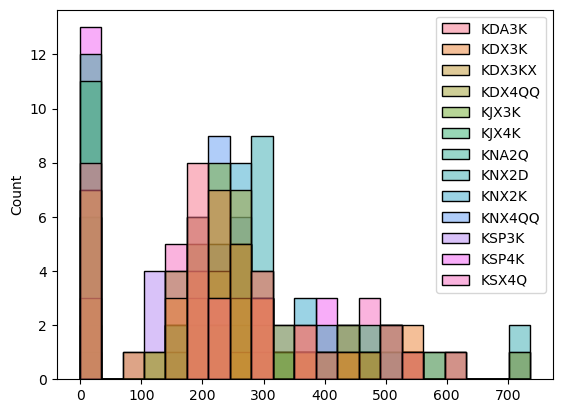

In [32]:
sns.histplot(std_by_roomtype.iloc[:,:-3])

In [33]:
model = ols("Target ~ KDA3K + KDX3K + KDX3KX + KDX4QQ + KJX3K + KJX4K + KNA2Q + KNX2D + KNX2K + KNX4QQ + KSP3K + KSP4K + KSX4Q + KSX5K", data = std_by_roomtype).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                    -152.933
Model:                            OLS   Adj. R-squared:               -296.604
Method:                 Least Squares   F-statistic:                    -1.064
Date:                Sat, 10 Jan 2026   Prob (F-statistic):               1.00
Time:                        17:13:54   Log-Likelihood:                 963.19
No. Observations:                  30   AIC:                            -1896.
Df Residuals:                      15   BIC:                            -1875.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9600   3.27e-15   5.99e+14      0.000       1.960       1.960
KDA3K      -1.561e-17   1.01e-17     -1.550      0.142   -3.71e-17    5.86e-18
KDX3K      -7.373e-18   2.38e-17     -0.310      0.761   -5.81e-17    4.34e-17
KDX3KX       4.77e-18   8.54e-18      0.558      0.585   -1.34e-17     2.3e-17
KDX4QQ     -5.204e-18   8.28e-18     -0.629      0.539   -2.28e-17    1.24e-17
KJX3K      -1.518e-17    1.4e-17     -1.082      0.296   -4.51e-17    1.47e-17
KJX4K      -5.855e-18   7.61e-18     -0.769      0.454   -2.21e-17    1.04e-17
KNA2Q       1.052e-17   7.15e-18      1.470      0.162   -4.73e-18    2.58e-17
KNX2D      -1.258e-17   6.76e-18     -1.861      0.082    -2.7e-17    1.83e-18
KNX2K      -2.602e-18   2.16e-17     -0.120      0.906   -4.86e-17    4.34e-17
KNX4QQ     -8.674e-19    2.6e-17     -0.033      0.974   -5.63e-17    5.46e-17
KSP3K       1.778e-17   1.05e-17      1.691      0.112   -4.63e-18    4.02e-17
KSP4K       5.855e-18   6.14e-18      0.954      0.355   -7.23e-18    1.89e-17
KSX4Q       3.079e-17   1.28e-17      2.405      0.030    3.51e-18    5.81e-17
KSX5K      -8.674e-19   7.58e-18     -0.114      0.910    -1.7e-17    1.53e-17
==============================================================================
Omnibus:                        0.803   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.669   Jarque-Bera (JB):                0.742
Skew:                          -0.061   Prob(JB):                        0.690
Kurtosis:                       2.239   Cond. No.                     4.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1]:
days = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
sns.set(style="whitegrid")
sns.regplot(x= days, y ='KDA3K', data=std_by_roomtype, ci=95, line_kws={"color": "red"})
sns.regplot(x=days, y ='KDX3K', data=std_by_roomtype, ci=95, line_kws={"color": "blue"})
sns.regplot(x=days, y ='KDX3KX', data=std_by_roomtype, ci=95, line_kws={"color": "violet"})
sns.regplot(x=days, y ='KDX4QQ', data=std_by_roomtype, ci=95, line_kws={"color": "green"})
sns.regplot(x=days, y='KJX3K', data=std_by_roomtype, ci=95, line_kws={"color": "yellow"})
sns.regplot(x=days, y ='KJX4K', data=std_by_roomtype, ci=95, line_kws={"color": "orange"})
sns.regplot(x=days, y = 'KNA2Q', data=std_by_roomtype, ci=95, line_kws={"color": "black"})
sns.regplot(x=days, y = 'KNX2D', data=std_by_roomtype, ci=95, line_kws={"color": "pink"})
sns.regplot(x=days, y ='KNX2K', data=std_by_roomtype, ci=95, line_kws={"color": "indigo"})
sns.regplot(x=days, y ='KNX4QQ', data=std_by_roomtype, ci=95, line_kws={"color": "purple"})
sns.regplot(x=days, y ='KSP3K', data=std_by_roomtype, ci=95, line_kws={"color": "teal"})
sns.regplot(x=days, y='KSP4K', data=std_by_roomtype, ci=95, line_kws={"color": "crimson"})
sns.regplot(x=days, y='KSX4Q', data=std_by_roomtype, ci=95, line_kws={"color": "gray"})
sns.regplot(x=days, y='KSX5K', data=std_by_roomtype, ci=95, line_kws={"color": "brown"})

# Show the plot
plt.title("OLS Regression with Seaborn")
plt.ylabel("Nightly Price")
plt.xlabel("Day in June")
plt.show()

NameError: name 'sns' is not defined